# Import Libraries


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder as le
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, accuracy_score

# Data Extraction

In [ ]:
attrition_data = pd.read_csv('/content/sample_data/Train.csv') #reading data 

In [ ]:
attrition_data.head() #printing first five rows

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,numberofhikes,worksatisfaction,financial stability,officehours satisfaction,support hours levels,collegiality,innovationlevels,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
attrition_data.shape #(rows, columns)

(7000, 24)

In [ ]:
attrition_data.isnull().any() #checking if columns has null vlaues

Employee_ID                  False
Gender                       False
Age                           True
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service               True
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                     True
Compensation_and_Benefits    False
Work_Life_balance             True
numberofhikes                False
worksatisfaction              True
financial stability          False
officehours satisfaction      True
support hours levels         False
collegiality                 False
innovationlevels             False
Attrition_rate               False
dtype: bool

# Data Preprocessing
###Fill Missing Values

In [ ]:
null_columns = [] #filtering out columns which has null values
for col in attrition_data.columns:
  if attrition_data[col].isnull().any() == True:
    null_columns.append(col)
null_columns

['Age',
 'Time_of_service',
 'Pay_Scale',
 'Work_Life_balance',
 'worksatisfaction',
 'officehours satisfaction']

In [ ]:
def fillNullValues(data,col): # function to fill up null values
  data[col].fillna((data[col].mean()),inplace=True)

In [ ]:
for col in null_columns:  #populating all the null columns
  fillNullValues(attrition_data,col)

In [ ]:
attrition_data.isnull().any() 

Employee_ID                  False
Gender                       False
Age                          False
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service              False
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                    False
Compensation_and_Benefits    False
Work_Life_balance            False
numberofhikes                False
worksatisfaction             False
financial stability          False
officehours satisfaction     False
support hours levels         False
collegiality                 False
innovationlevels             False
Attrition_rate               False
dtype: bool

In [ ]:
Attrition = list(attrition_data['Attrition_rate'].round(decimals=0)) #rounding off attrition value to 0 or 1

In [ ]:
attrition_data['Attrition'] = Attrition  #inserting new column into dataframe
attrition_data['Attrition'] = le().fit_transform(attrition_data['Attrition'])

### Correlation

In [ ]:
attrition_data.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,numberofhikes,worksatisfaction,financial stability,officehours satisfaction,support hours levels,collegiality,innovationlevels,Attrition_rate,Attrition
Age,1.000000,-0.005599,0.883423,0.141393,0.001230,0.011897,0.002367,0.012578,0.002985,0.005534,0.005023,0.007356,0.001664,0.000014,-0.000809,0.008476,-0.015086,-0.003848
Education_Level,-0.005599,1.000000,-0.012657,-0.002077,0.002991,-0.017690,0.009986,0.006830,-0.015241,-0.002185,-0.009894,-0.009689,0.004283,0.005444,0.009195,0.012909,-0.008143,-0.012139
Time_of_service,0.883423,-0.012657,1.000000,0.135671,-0.003452,0.004791,-0.002261,0.020085,-0.002527,0.004715,0.003659,0.006804,-0.005679,0.003158,0.007542,0.006972,-0.016213,-0.009334
Time_since_promotion,0.141393,-0.002077,0.135671,1.000000,0.014147,-0.012061,-0.008851,-0.008896,-0.007418,-0.002873,0.004022,-0.002783,-0.003549,0.000563,0.017264,0.005173,0.013880,0.012350
growth_rate,0.001230,0.002991,-0.003452,0.014147,1.000000,0.008460,-0.006887,-0.004143,-0.018306,0.001351,0.010437,0.010991,0.020272,-0.015122,-0.005860,-0.017993,0.014247,0.005983
Travel_Rate,0.011897,-0.017690,0.004791,-0.012061,0.008460,1.000000,0.021299,-0.011681,0.004129,0.023898,0.008002,-0.009019,-0.005639,-0.003866,-0.012280,-0.006271,-0.012608,-0.014018
Post_Level,0.002367,0.009986,-0.002261,-0.008851,-0.006887,0.021299,1.000000,0.022376,-0.014460,-0.008458,-0.006750,0.010387,-0.012172,0.013008,0.002765,-0.003397,0.016402,0.005794
Pay_Scale,0.012578,0.006830,0.020085,-0.008896,-0.004143,-0.011681,0.022376,1.000000,-0.022704,0.011346,0.006035,0.003378,-0.009742,0.018070,-0.012315,0.002379,-0.015221,-0.015341
Work_Life_balance,0.002985,-0.015241,-0.002527,-0.007418,-0.018306,0.004129,-0.014460,-0.022704,1.000000,-0.022025,-0.001423,0.004473,-0.025473,0.022178,0.003869,0.024506,0.020738,0.016122
numberofhikes,0.005534,-0.002185,0.004715,-0.002873,0.001351,0.023898,-0.008458,0.011346,-0.022025,1.000000,0.002181,-0.003318,0.002009,0.007904,-0.002771,0.009355,-0.008073,0.015204


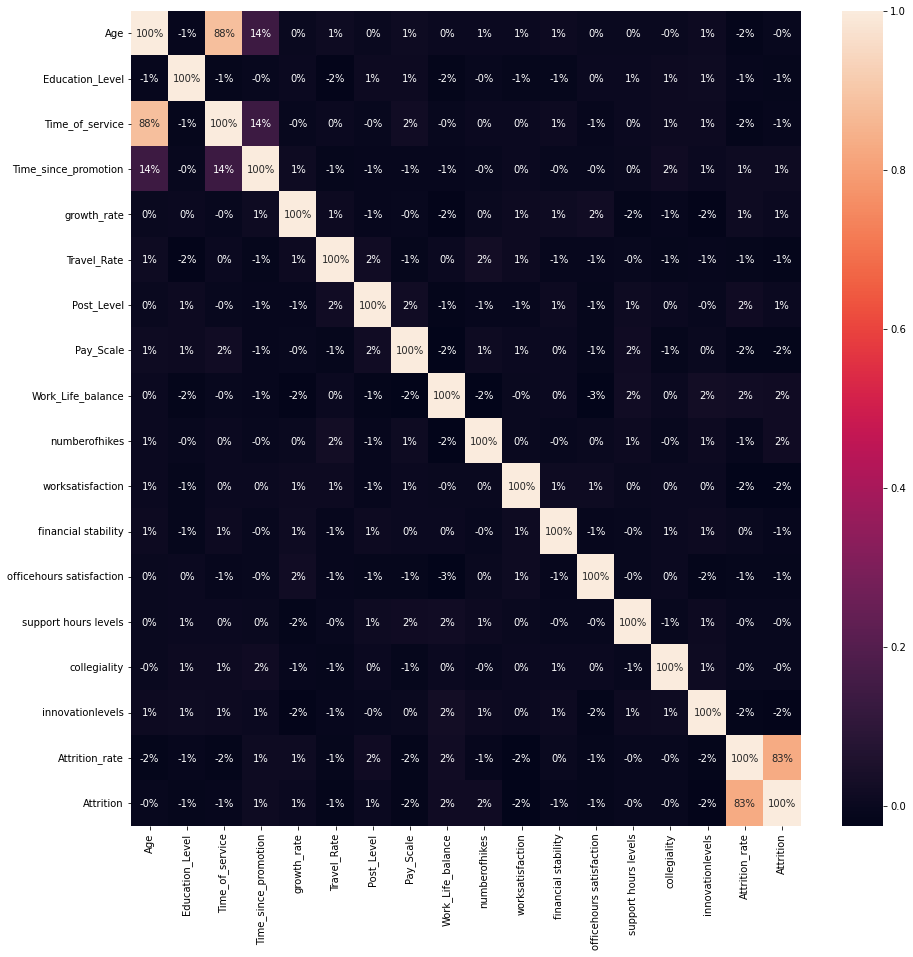

In [ ]:
plt.figure(figsize= (15,15))
sns.heatmap(attrition_data.corr(), annot=True, fmt = '.0%')
plt.show()
plt.close()


### Label Encoding

In [ ]:
#Label encoding to convert words to numeric values
for col in attrition_data.columns:
  if attrition_data[col].dtype == 'int64'or attrition_data[col].dtype == 'float64':
    continue
  else:
    attrition_data[col] = le().fit_transform(attrition_data[col])

In [ ]:
attrition_data.head() #printing first five rows

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Work_Life_balance,numberofhikes,worksatisfaction,financial stability,officehours satisfaction,support hours levels,collegiality,innovationlevels,Attrition_rate,Attrition
0,4143,0,42.0,4,0,1,2,2,4.0,4,...,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841,0
1,2500,1,24.0,3,1,3,3,0,5.0,4,...,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670,0
2,5312,0,58.0,3,0,0,8,2,27.0,3,...,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851,0
3,2339,0,26.0,3,1,2,1,1,4.0,3,...,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668,0
4,3885,0,31.0,1,0,3,3,2,5.0,4,...,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827,0


In [ ]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   int64  
 1   Gender                     7000 non-null   int64  
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   int64  
 5   Hometown                   7000 non-null   int64  
 6   Unit                       7000 non-null   int64  
 7   Decision_skill_possess     7000 non-null   int64  
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

###Dropping Column

In [ ]:
attrition_data = attrition_data.drop(['Employee_ID'], axis = 1) #dropping columns which doesnot impact attrition
attrition_data.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Work_Life_balance,numberofhikes,worksatisfaction,financial stability,officehours satisfaction,support hours levels,collegiality,innovationlevels,Attrition_rate,Attrition
0,0,42.0,4,0,1,2,2,4.0,4,33,...,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841,0
1,1,24.0,3,1,3,3,0,5.0,4,36,...,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670,0
2,0,58.0,3,0,0,8,2,27.0,3,51,...,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851,0
3,0,26.0,3,1,2,1,1,4.0,3,56,...,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668,0
4,0,31.0,1,0,3,3,2,5.0,4,62,...,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827,0


### *OverSampling of data*

In [ ]:
attrition_data['Attrition'].value_counts()

0    6426
1     574
Name: Attrition, dtype: int64

In [ ]:
X = attrition_data.drop(['Attrition', 'Attrition_rate'], axis = 1)
Y = attrition_data['Attrition']
print(X.shape, Y.shape)

(7000, 22) (7000,)


In [ ]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(X, Y)

### Model Building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=42) #splitting into train and test data

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9639, 22), (3213, 22), (9639,), (3213,))

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_acc_list = [] #to find which k value brings high accuracy
test_acc_list = []
k_range = range(1, 11)
for k in k_range:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(k)
    print('Test:', accuracy_score(y_test, y_pred_test))
    print('Train:', accuracy_score(y_train, y_pred_train))
    print('--------------------------------------------')

1
Test: 0.9508247743541861
Train: 1.0
--------------------------------------------
2
Test: 0.9480236539060068
Train: 0.9997925095964312
--------------------------------------------
3
Test: 0.9072517896047307
Train: 0.9500985579416952
--------------------------------------------
4
Test: 0.906318082788671
Train: 0.949787322336342
--------------------------------------------
5
Test: 0.8702147525676938
Train: 0.9065255731922398
--------------------------------------------
6
Test: 0.8652349828820417
Train: 0.9060068471833178
--------------------------------------------
7
Test: 0.8306878306878307
Train: 0.8661686896981015
--------------------------------------------
8
Test: 0.8163709928415811
Train: 0.8645087664695508
--------------------------------------------
9
Test: 0.7871148459383753
Train: 0.832762734723519
--------------------------------------------
10
Test: 0.7833800186741363
Train: 0.8313103018985372
--------------------------------------------


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1) #training the model with k = 1
knn.fit(X_train, y_train)
Y_pred_test = knn.predict(X_test)
Y_pred_train = knn.predict(X_train)
print(accuracy_score(y_train, Y_pred_train))
print(accuracy_score(y_test, Y_pred_test))

1.0
0.9508247743541861


### Test Data

In [ ]:
attrition_test_data = pd.read_csv('/content/sample_data/Test.csv') #reading test data

### Filling NULL values

In [ ]:
null_columns_test = [] #filling up null values
for col in attrition_test_data.columns:
  if attrition_test_data[col].isnull().any() == True:
    null_columns_test.append(col)
null_columns_test

['Age',
 'Time_of_service',
 'Pay_Scale',
 'Work_Life_balance',
 'worksatisfaction',
 'officehours satisfaction']

In [ ]:
for col in null_columns_test:
  fillNullValues(attrition_test_data,col)

### Label Encoding for test data

In [ ]:
for col in attrition_test_data.columns: #label encoding
  if attrition_test_data[col].dtype == 'int64'or attrition_test_data[col].dtype == 'float64':
    continue
  else:
    attrition_test_data[col] = le().fit_transform(attrition_test_data[col])

In [ ]:
attrition_test_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,numberofhikes,worksatisfaction,financial stability,officehours satisfaction,support hours levels,collegiality,innovationlevels
0,1702,0,32.0,5,1,3,9,2,7.0,4,...,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,2958,1,65.0,2,1,2,2,3,41.0,2,...,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,1628,1,52.0,3,0,3,10,3,21.0,3,...,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,2709,1,50.0,5,1,4,4,0,11.0,4,...,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,2580,0,44.0,3,0,1,9,2,12.0,4,...,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [ ]:
Emp_ID = (attrition_test_data['Employee_ID'])
print(Emp_ID)

0       1702
1       2958
2       1628
3       2709
4       2580
        ... 
2995    1677
2996      12
2997    2656
2998    2405
2999    1990
Name: Employee_ID, Length: 3000, dtype: int64


In [ ]:
attrition_test_data = attrition_test_data.drop(['Employee_ID'], axis = 1) #dropping employee id column

In [ ]:
test_preds=knn.predict(attrition_test_data) #predicting

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
df_preds=pd.DataFrame()
df_preds["Attrition_rate"] = test_preds 
df_preds["EMP_ID"] = Emp_ID
df_preds

,Attrition_rate,EMP_ID
0,0,1702
1,0,2958
2,0,1628
3,0,2709
4,0,2580
...,...,...
2995,0,1677
2996,0,12
2997,0,2656
2998,0,2405


In [ ]:
df_preds["Attrition_rate"].value_counts()

0    2917
1      83
Name: Attrition_rate, dtype: int64

In [ ]:
print(df_preds[df_preds['Attrition_rate'] == 1]) #printing all rows numbers with attrition 1

      Attrition_rate  EMP_ID
72                 1    1132
190                1    1114
223                1    1039
224                1     660
280                1    1078
...              ...     ...
2777               1     886
2816               1     813
2858               1    1158
2859               1      68
2975               1     826

[83 rows x 2 columns]


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df_preds.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
